In [2]:
import pandas as pd 
import numpy as np 

In [3]:
data = pd.read_csv(r"C:\Users\Michael Okuns\Downloads\TV_Forecast\mock_kaggle.csv")

In [4]:
data.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [5]:
data.columns = ["date", "sale", "stock", "price"]

In [6]:
data.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [7]:
data.set_index("date", inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 2014-01-01 to 2016-07-31
Data columns (total 3 columns):
sale     937 non-null int64
stock    937 non-null int64
price    937 non-null float64
dtypes: float64(1), int64(2)
memory usage: 29.3+ KB


In [9]:
data.isna().sum()

sale     0
stock    0
price    0
dtype: int64

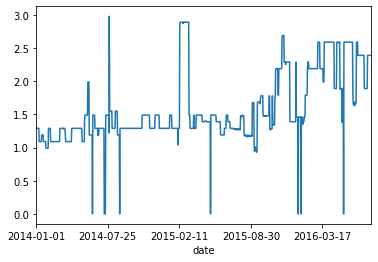

In [10]:
data["price"].plot()

In [11]:
data.columns 

Index(['sale', 'stock', 'price'], dtype='object')

In [12]:
lag_col = ['sale', 'stock']
window1 = 3
window2 = 7

In [14]:
for features in lag_col: 
    data[features + "rollingmean3"] =data[features].rolling(window = window1).mean()
    data[features + "rollingmean7"] =data[features].rolling(window= window2).mean()

In [15]:
for features in lag_col: 
    data[features + "rollingstd3"] =data[features].rolling(window = window1).std()
    data[features + "rollingstd7"] =data[features].rolling(window= window2).std()

In [16]:
data.columns

Index(['sale', 'stock', 'price', 'salerollingmean3', 'salerollingmean7',
       'stockrollingmean3', 'stockrollingmean7', 'salerollingstd3',
       'salerollingstd7', 'stockrollingstd3', 'stockrollingstd7'],
      dtype='object')

In [17]:
data.head()

,sale,stock,price,salerollingmean3,salerollingmean7,stockrollingmean3,stockrollingmean7,salerollingstd3,salerollingstd7,stockrollingstd3,stockrollingstd7
date,,,,,,,,,,,
2014-01-01,0,4972,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,70,4902,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,59,4843,1.29,43.000000,NaN,4905.666667,NaN,37.643060,NaN,64.578118,NaN
2014-01-04,93,4750,1.29,74.000000,NaN,4831.666667,NaN,17.349352,NaN,76.631151,NaN
2014-01-05,96,4654,1.29,82.666667,NaN,4749.000000,NaN,20.550750,NaN,94.503968,NaN


In [18]:
data.isna().sum()

sale                 0
stock                0
price                0
salerollingmean3     2
salerollingmean7     6
stockrollingmean3    2
stockrollingmean7    6
salerollingstd3      2
salerollingstd7      6
stockrollingstd3     2
stockrollingstd7     6
dtype: int64

In [19]:
for col in data.columns:
    data[col].fillna(data[col].median(), inplace = True)

In [20]:
data.isna().sum()

sale                 0
stock                0
price                0
salerollingmean3     0
salerollingmean7     0
stockrollingmean3    0
stockrollingmean7    0
salerollingstd3      0
salerollingstd7      0
stockrollingstd3     0
stockrollingstd7     0
dtype: int64

In [21]:
data.columns 

Index(['sale', 'stock', 'price', 'salerollingmean3', 'salerollingmean7',
       'stockrollingmean3', 'stockrollingmean7', 'salerollingstd3',
       'salerollingstd7', 'stockrollingstd3', 'stockrollingstd7'],
      dtype='object')

In [22]:
ind_feature = ['salerollingmean3', 'salerollingmean7',
       'stockrollingmean3', 'stockrollingmean7', 'salerollingstd3',
       'salerollingstd7', 'stockrollingstd3', 'stockrollingstd7']

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 2014-01-01 to 2016-07-31
Data columns (total 11 columns):
sale                 937 non-null int64
stock                937 non-null int64
price                937 non-null float64
salerollingmean3     937 non-null float64
salerollingmean7     937 non-null float64
stockrollingmean3    937 non-null float64
stockrollingmean7    937 non-null float64
salerollingstd3      937 non-null float64
salerollingstd7      937 non-null float64
stockrollingstd3     937 non-null float64
stockrollingstd7     937 non-null float64
dtypes: float64(9), int64(2)
memory usage: 87.8+ KB


In [24]:
train_data = data[:468]
test_data = data[468:]

In [25]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [26]:
model = auto_arima(train_data["price"], exogenous = train_data[ind_feature], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-115.217, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-76.230, Time=0.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-115.255, Time=1.66 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-118.470, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-77.677, Time=2.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-116.177, Time=2.96 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-116.369, Time=1.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-114.227, Time=3.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-120.469, Time=1.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-118.177, Time=1.93 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-118.368, Time=2.47 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-117.255, Time=1.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-116.227, Time=2.50 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 27.258 seconds


In [30]:
model.fit(train_data["price"], train_data[ind_feature])

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
forecast = model.predict(n_periods = len(test_data), exogenous =test_data[ind_feature])

In [34]:
forecast

array([1.37259568, 1.34891317, 1.34792426, 1.36652171, 1.34478424,
       1.33149228, 1.33281056, 1.34926286, 1.35795722, 1.3544216 ,
       1.34070819, 1.31602547, 1.30045392, 1.29196772, 1.31292244,
       1.3272283 , 1.34985847, 1.37333338, 1.42989778, 1.47638595,
       1.49974417, 1.50542434, 1.5054155 , 1.50581075, 1.50559075,
       1.5052557 , 1.50541123, 1.50545191, 1.50556993, 1.50544047,
       1.50567754, 1.50591894, 1.50602154, 1.50602136, 1.50601976,
       1.50601213, 1.5061934 , 1.5061934 , 1.5061934 , 1.5061934 ,
       1.5061934 , 1.5061934 , 1.50514225, 1.50482579, 1.50568586,
       1.50560212, 1.48037783, 1.43548606, 1.39051104, 1.36656191,
       1.33101357, 1.29265338, 1.26067859, 1.28023057, 1.2833659 ,
       1.29161454, 1.29491953, 1.30125608, 1.32335981, 1.32055274,
       1.31834755, 1.33473605, 1.32896404, 1.34774462, 1.36440735,
       1.35199419, 1.36299876, 1.36803705, 1.35795188, 1.36910363,
       1.35564797, 1.33815837, 1.31113999, 1.30181317, 1.27810

In [35]:
test_data["forecast"] = forecast

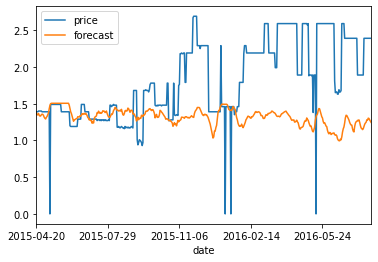

In [36]:
test_data[["price", "forecast"]].plot()

In [37]:
from sklearn import metrics

In [38]:
np.sqrt(metrics.mean_squared_error(test_data["price"], test_data["forecast"]))

0.750379868728063

In [39]:
metrics.mean_absolute_error(test_data['price'],test_data['forecast'])

0.569358433276702